In [49]:
from notebook_functions import Process
from notebook_functions import *
%load_ext autoreload
%autoreload 2

train_import = pd.read_csv('../data/census_income_learn.csv', header=None)
train = Process(train_import, is_training=True)
train.add_headers_and_clean()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
train.encode_labels()

In [2]:
# to show output for all lines in the cell not only the last one :
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# for example check the output of the following cell

In [ ]:
import plotly.express as px

for feature in [feature for feature in train.continuous_features if feature in train.data.columns]:
    df = pd.DataFrame(train.data[feature].value_counts()).reset_index()
    df.columns = [feature, 'count']
    fig = px.histogram(df, x=feature, y='count',
                       marginal="box", # or violin, rug
                       hover_data=df.columns, title=f'Distribution of {feature}', nbins=int(len(df[feature].unique())/1))
    fig.update_layout(yaxis_title=f"Sum of {feature}")
    print(train.data[feature].describe())

In [39]:
def group_lower_ranking_values(df, column):
    rating_counts = df.groupby(column).agg('count')
    pct_value = rating_counts[lambda x: x.columns[0]].quantile(.5)
    values_below_pct_value = rating_counts[lambda x: x.columns[0]].loc[lambda s: s < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row 
    rating_grouped = df.apply(fix_values, axis=1)
    return rating_grouped


In [40]:
for feature in [feature for feature in train.nominal_features if feature in train.data.columns]:
    if len(train.data[feature].value_counts())>10:
        data = pd.DataFrame(group_lower_ranking_values(train.data, feature)[feature].value_counts()).reset_index()
    else: 
        data = pd.DataFrame(train.data[feature].value_counts().reset_index())
    fig = px.bar(data, x='index', y=feature)
    fig.update_layout(yaxis_title=f"Sum of {feature}", xaxis_title=feature, title=f'Count of {feature} values')


In [242]:
data.isna().sum()

index    0
year     0
dtype: int64

In [41]:
import plotly.express as px
data = train.data
fig = px.scatter_matrix(data,
    dimensions=[feature for feature in train.continuous_features if feature in train.data.columns],
    color="income")

fig.update_layout(
    title='Iris Data set',
    dragmode='select',
    width=1200,
    height=1500,
    hovermode='closest',
)


In [42]:
px.bar(y=train.data.income.value_counts(), title='Distribution of Income')

In [310]:
data.income.apply(lambda x: f"{round(x/train.data.shape[0]*100, 2)}%")

- 50000.    93.79%
50000+.      6.21%
Name: income, dtype: object

In [43]:
for feature in [feature for feature in train.continuous_features if feature in train.data.columns]:
    display_group_density_plot(groupby = 'income', \
                               on = feature, \
                               df = train.data, \
                               figsize = (15, 6), \
                               palette = sns.color_palette('Set1'));

In [22]:
# just showing how to use pivot tables
pd.pivot_table(train.data, values='weeks_worked_in_year', index=['full_or_part_time_employment_stat', 'sex'])

weeks_worked_in_year
full_or_part_time_employment_stat  sex                         
Children or Armed Forces           Female             16.793528
                                   Male               20.802255
Full-time schedules                Female             45.463150
                                   Male               47.692446
Not in labor force                 Female              3.247184
                                   Male                3.949405
PT for econ reasons usually FT     Female             43.497561
                                   Male               44.318750
PT for econ reasons usually PT     Female             46.047782
                                   Male               45.528090
PT for non-econ reasons usually FT Female             44.220970
                                   Male               46.916021
Unemployed full-time               Female             24.428125
                                   Male               27.727609
Unemployed part- time              Female             24.173077
                                   Male               22.557276

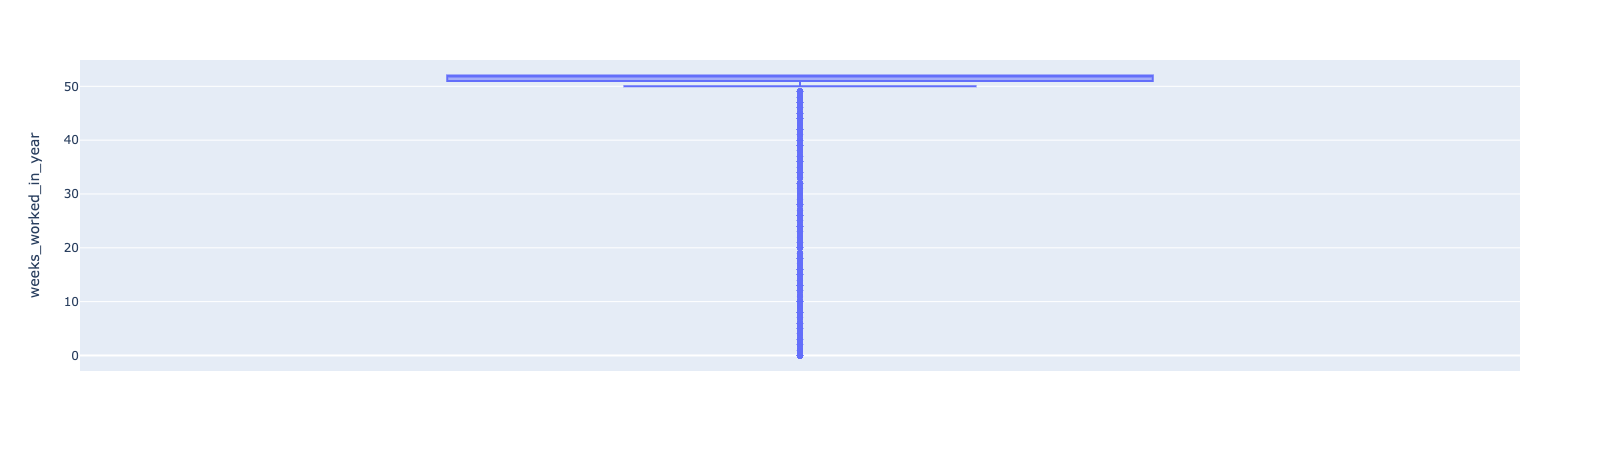

In [13]:
import plotly.express as px
df = px.data.tips()
fig = px.box(train.data[train.data.full_or_part_time_employment_stat=='Full-time schedules']
, y="weeks_worked_in_year")
fig.show()

In [28]:
#
print(f'{train.data[train.data.full_or_part_time_employment_stat=="Full-time schedules"].weeks_worked_in_year.value_counts().loc[0]} \
people are listed as working full time but then say they work 0 hours a year')
       

926 people are listed as working full time but then say they work 0 hours a year


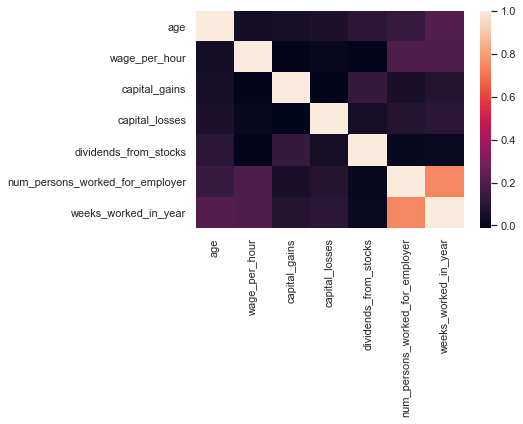

In [37]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(train.data[train.continuous_features].corr())

In [17]:
# Are there multiple people shown here in the same household?
# What are traits that would be the same for people in the same household?

In [7]:
train.data[['detailed_household_and_family_stat','detailed_household_summary_in_household', 'race', 'hispanic_origin',
                 'region_of_previous_residence', 'state_of_previous_residence']]

,detailed_household_and_family_stat,detailed_household_summary_in_household
0,Other Rel 18+ ever marr not in subfamily,Other relative of householder
1,Householder,Householder
2,Child 18+ never marr Not in a subfamily,Child 18 or older
3,Child <18 never marr not in subfamily,Child under 18 never married
4,Child <18 never marr not in subfamily,Child under 18 never married
...,...,...
199518,Householder,Householder
199519,Householder,Householder
199520,Householder,Householder
199521,Child <18 never marr not in subfamily,Child under 18 never married


In [28]:
duplicate_table = train.data[train.data.duplicated(subset=['detailed_household_and_family_stat','detailed_household_summary_in_household', 'race', 'hispanic_origin',
                 'region_of_previous_residence', 'state_of_previous_residence'])]
duplicate_table

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,income
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
9,34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
10,8,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
16,47,Private,39,36,Bachelors degree(BA AB BS),0,Not in universe,Never married,Personal services except private HH,Machine operators assmblrs & inspctrs,...,Germany,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
19,35,Private,12,41,High school graduate,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Handlers equip cleaners etc,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,49,95,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
199519,65,Self-employed-incorporated,37,2,11th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
199520,47,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95,- 50000.
199521,16,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.


In [21]:
# Is our sample representative of our population (America is 1994-1995)?
#race:
pd.DataFrame(train.data.race.value_counts()).apply(lambda x: round(x/train.data.race.count()*100, 2), axis=1).rename(columns={'race': '% of pop'})
train.data.train.race.count()



,% of pop
White,83.88
Black,10.23
Asian or Pacific Islander,2.92
Other,1.83
Amer Indian Aleut or Eskimo,1.13
